# Importing the necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Loading the data

In [2]:
df=pd.read_csv("student-mat.csv",sep=';')
#sep=';' — this tells Pandas to treat semicolons as column delimiters.

# View the first five rows of your data

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Display all columns

In [4]:
pd.set_option('display.max_columns', None)
# the above code tells pandas to display all the columns


# Check the columns

In [5]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

# Get quick summary

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

# Check for missing values


In [7]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

The dataset has no null values

# Checking for duplicates

In [8]:
df.duplicated().sum()

0

There are no duplicate values

# Checking the data types

# Encoding categoricals

Categorical columns in a dataset contain discrete categories or text labels.
Encoding categorical columns means to covert text labels or categories into numbers which can be used by machine learning algorithms

In [9]:
# Find categorical features
categorical_columns = df.select_dtypes(include='object').columns
print(categorical_columns)


Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


The above code shows the categorical columns

In [10]:
#encoding categorical variables
df_encoded=pd.get_dummies(df,columns=categorical_columns,drop_first=True)
#The line above converts categorical variables into numerical using pd.get_dummies that performs one hot encoding

In [11]:
#confirm the dataset
print(df_encoded.shape)
print(df_encoded.head())

(395, 42)
   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  Walc  health  absences  G1  G2  G3  school_MS  sex_M  address_U  \
0     1     1       3         6   5   6   6      False  False       True   
1     1     1       3         4   5   5   6      False  False       True   
2     2     3       3        10   7   8  10      False  False       True   
3     1     1       5         2  15  14  15      False  False       True   
4     1     2       5         4   6  10  10      False  False       True   

   famsize_LE3  Pstatus_T  Mjob_health  Mjob_other  

# Feature selection

Feature selection is the process of choosing the most relevant columns from your data set that will help you in predicting the target 

### Calculate correlation with target variable

In [12]:
# Create correlation matrix
correlation_matrix = df_encoded.corr()

# Check correlation of all features with G3
correlation_with_g3 = correlation_matrix['G3'].drop('G3')

correlation_with_g3


age                 -0.161579
Medu                 0.217147
Fedu                 0.152457
traveltime          -0.117142
studytime            0.097820
failures            -0.360415
famrel               0.051363
freetime             0.011307
goout               -0.132791
Dalc                -0.054660
Walc                -0.051939
health              -0.061335
absences             0.034247
G1                   0.801468
G2                   0.904868
school_MS           -0.045017
sex_M                0.103456
address_U            0.105756
famsize_LE3          0.081407
Pstatus_T           -0.058009
Mjob_health          0.116158
Mjob_other          -0.096477
Mjob_services        0.078429
Mjob_teacher         0.057712
Fjob_health          0.057111
Fjob_other          -0.053483
Fjob_services       -0.016108
Fjob_teacher         0.095374
reason_home         -0.021359
reason_other         0.052008
reason_reputation    0.095692
guardian_mother      0.022338
guardian_other      -0.087774
schoolsup_

### Visualising the correlation heatmap

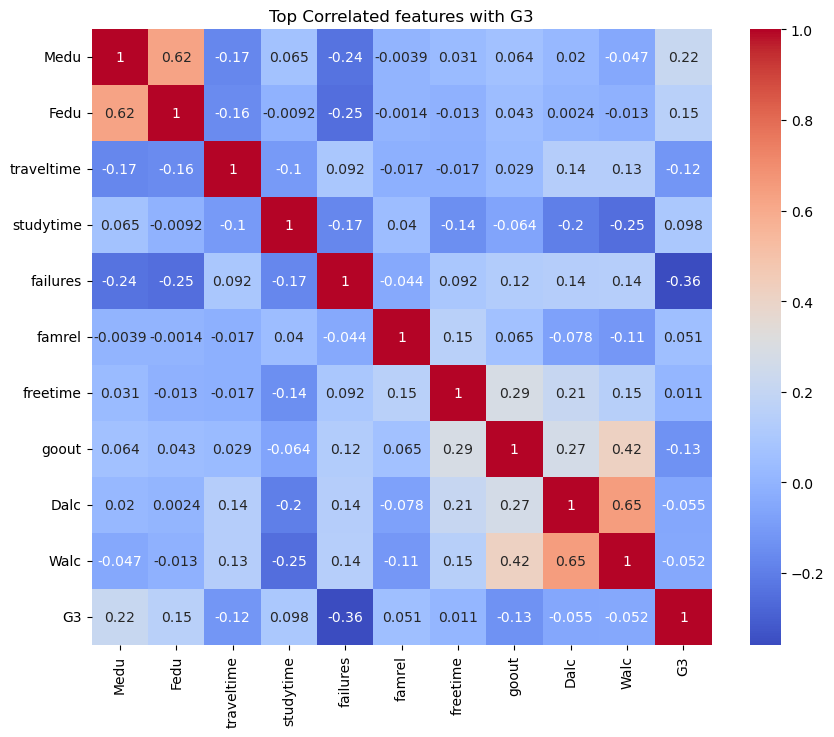

In [13]:
#Plotting a heatmap of top correlated features
top_corr_features = correlation_with_g3[1:11].index
plt.figure(figsize=(10,8))
sns.heatmap(df_encoded[top_corr_features.tolist() + ['G3']].corr(), annot=True, cmap='coolwarm')
plt.title('Top Correlated features with G3')
plt.show()

### Select strongly correlated features

In [14]:
selected_features = correlation_with_g3[correlation_with_g3.abs() >= 0.1].index.tolist()


### Create a new data set with target features

In [15]:
# Include selected features and the original target 'G3'
df_selected = df_encoded[selected_features + ['G3']]


### Create a column named pass

In [16]:
# Create binary target
df_selected.loc[:, 'Pass'] = (df_selected['G3'] >= 10).astype(int)

#

# Drop G3 since we're predicting Pass now
df_class = df_selected.drop('G3', axis=1)


C:\Users\san\AppData\Local\Temp\ipykernel_8100\3213938220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[:, 'Pass'] = (df_selected['G3'] >= 10).astype(int)


df_selected['G3'] >= 10
 This checks each student’s grade.
 If it’s greater than or equal to 10, it returns True (they passed).
 If less than 10, it returns False (they failed).

.astype(int)
 Converts True to 1 and False to 0.

df_selected['Pass'] = ...
It creates a new column called "Pass" in the dataframe:

1 → student passed

0 → student failed

# Splitting the data

In [17]:
#separate  features(X) and Target (y)
X=df_class.drop('Pass',axis=1)
y=df_class['Pass']

#Split the data into 80% training and 20% testing 
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2, random_state=42
)


# Training the models

### logistic regression

In [18]:
# Create and train the model
log_model = LogisticRegression(max_iter=1000)  
log_model.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

### Decision trees

In [19]:
# train the decision tree
tree_model=DecisionTreeClassifier(random_state=42)

tree_model.fit(X_train,y_train)




DecisionTreeClassifier(random_state=42)

In [20]:
# Predict on test set
y_pred_log = log_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)

# Evaluating the models using appropriate metrics

In [21]:
#  Evaluate Logistic Regression
print(" Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

#  Evaluate Decision Tree
print("\n Decision Tree Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("F:\n", classification_report(y_test, y_pred_tree))

 Logistic Regression Evaluation:
Accuracy: 0.8987341772151899
Confusion Matrix:
 [[24  3]
 [ 5 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.94      0.90      0.92        52

    accuracy                           0.90        79
   macro avg       0.88      0.90      0.89        79
weighted avg       0.90      0.90      0.90        79


 Decision Tree Evaluation:
Accuracy: 0.8860759493670886
Confusion Matrix:
 [[23  4]
 [ 5 47]]
F:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.92      0.90      0.91        52

    accuracy                           0.89        79
   macro avg       0.87      0.88      0.87        79
weighted avg       0.89      0.89      0.89        79



Logistic Regression Evaluation:
Accuracy: 0.8987 (89.9%)

F1-score for class 1 (Pass): 0.92

Confusion Matrix:
True Positives: 47
False Negatives: 5
False Positives: 3
True Negatives: 24

Decision Tree Evaluation:
Accuracy: 0.8860 (88.6%)

F1-score for class 1 (Pass): 0.91

Confusion Matrix:
True Positives: 47
False Negatives: 5
False Positives: 4
True Negatives: 23

# Logistic Regression performs slightly better in accuracy, F1-score, and precision, so it’s the better model for this task!